# Linear Regression Without Sklearn

### Lets create a Fahrenheit prediction model where Celsius is Feature.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")


In [2]:
celsius_feature = np.arange(20,80)
fahren_label = (celsius_feature * 1.8) + 32

In [3]:
df = pd.DataFrame({"Feature":celsius_feature,"Label":fahren_label})

In [4]:
df.sample(10)

,Feature,Label
52,72,161.6
38,58,136.4
42,62,143.6
30,50,122.0
8,28,82.4
4,24,75.2
19,39,102.2
47,67,152.6
39,59,138.2
48,68,154.4


In [6]:
X = df['Feature'] 
Y = df.Label 

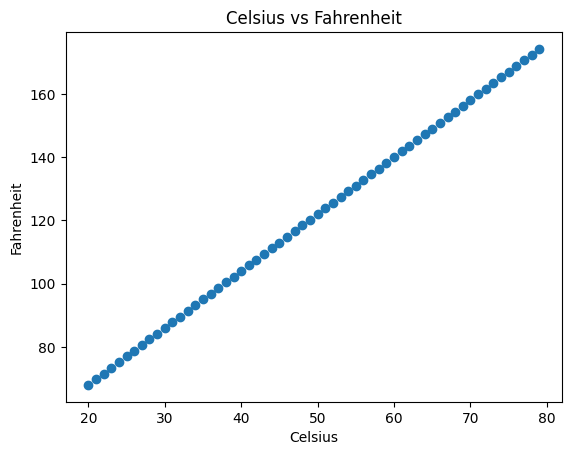

In [7]:
plt.scatter(X.values,Y.values)
plt.title("Celsius vs Fahrenheit")
plt.xlabel("Celsius")
plt.ylabel("Fahrenheit")
plt.show()

# 1. Data Preprocessing

### Remove the missing value
### Scale numerical data type and Encode categorical data type
### Split the Data

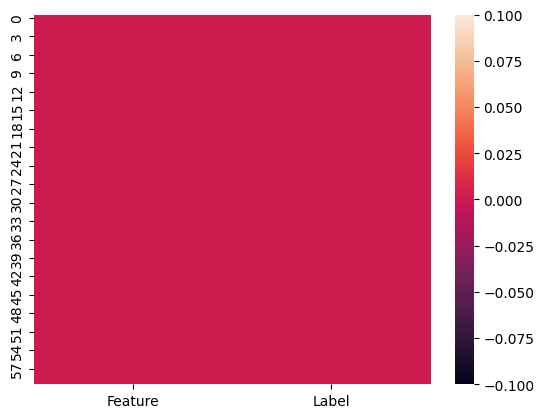

In [8]:
import seaborn as sns
sns.heatmap(df.isnull())
plt.show()

In [9]:
class StandardScalar():
    def fit_transform(self,x):
        mean = np.mean(x)
        std_dev = np.std(x)
        return (x-mean)/std_dev

In [10]:
sc = StandardScalar()
x = sc.fit_transform(X)

In [11]:
x = x.to_numpy()
Y = Y.values

In [14]:
y = sc.fit_transform(Y)
y

array([-1.7034199 , -1.64567685, -1.5879338 , -1.53019075, -1.47244771,
       -1.41470466, -1.35696161, -1.29921857, -1.24147552, -1.18373247,
       -1.12598942, -1.06824638, -1.01050333, -0.95276028, -0.89501723,
       -0.83727419, -0.77953114, -0.72178809, -0.66404504, -0.606302  ,
       -0.54855895, -0.4908159 , -0.43307286, -0.37532981, -0.31758676,
       -0.25984371, -0.20210067, -0.14435762, -0.08661457, -0.02887152,
        0.02887152,  0.08661457,  0.14435762,  0.20210067,  0.25984371,
        0.31758676,  0.37532981,  0.43307286,  0.4908159 ,  0.54855895,
        0.606302  ,  0.66404504,  0.72178809,  0.77953114,  0.83727419,
        0.89501723,  0.95276028,  1.01050333,  1.06824638,  1.12598942,
        1.18373247,  1.24147552,  1.29921857,  1.35696161,  1.41470466,
        1.47244771,  1.53019075,  1.5879338 ,  1.64567685,  1.7034199 ])

In [15]:
train_size = int(0.8*len(x))

size = list(range(len(x)))
np.random.shuffle(size)
x = x[size]
y = y[size]

In [16]:
x[:10]
y[:10]

array([-1.29921857, -0.95276028,  0.43307286,  1.64567685,  0.89501723,
        0.72178809,  0.14435762, -0.31758676, -0.606302  ,  0.95276028])

In [17]:
x_train = x[0:train_size].reshape(-1,1)
y_train = y[0:train_size].reshape(-1,1)
x_test = x[train_size:].reshape(-1,1)
y_test = y[train_size:].reshape(-1,1)

In [18]:
x_train.shape

(48, 1)

In [19]:
m = x_train.shape[1]
W = 0.01 * np.random.randn(m,1)
b = np.zeros((1, 1))

In [20]:
W.shape

(1, 1)

In [21]:
b.shape

(1, 1)

In [22]:
y_pred = np.dot(x_train,W) + b

In [23]:
y_pred.shape

(48, 1)

In [24]:
y_train.shape

(48, 1)

In [25]:
def loss(y_train,y_pred):
    N = len(y_train)
    loss = (1/N) * np.sum((y_pred - y_train)**2)
    return loss

In [26]:
def optimize(W,b,x_train,y_train,learning_rate,y_pred):
    N = len(y_train)
    dW = -(2/N) * np.sum((y_train - y_pred) * x_train)
    db = -(2/N) * np.sum((y_train - y_pred))
    W += -learning_rate* dW
    b += -learning_rate* db
    
    grad = {"dW":dW,"db":db}
    update = {"W":W,"b":b}
    return grad,update

In [27]:
def predict(W,b,X):
    prediction = np.dot(X,W) + b
    return prediction

In [32]:
num_of_iterations = 201 
learning_rate = 0.01
W = 0.01 * np.random.randn(m,1)
b = np.zeros((1, 1))

for i in range(num_of_iterations):
    y_pred = np.dot(x_train, W) + b
    loss_func = loss(y_train,y_pred)
    
    if i%20 == 0:
        print(f"Iteration:{i}, Loss: {loss_func}")
    
    gradient,change = optimize(W,b,x_train,y_train,learning_rate,y_pred)
    dW = gradient["dW"]
    db = gradient['db']
    W = change["W"]
    b = change["b"]
    
train_predict = predict(W,b,x_train)
test_predict = predict(W,b,x_test)

Iteration:0, Loss: 1.0340588882272626
Iteration:20, Loss: 0.4450754884475384
Iteration:40, Loss: 0.1918917632492823
Iteration:60, Loss: 0.08287768335346976
Iteration:80, Loss: 0.03585914446279115
Iteration:100, Loss: 0.015544025972416043
Iteration:120, Loss: 0.006750657685514848
Iteration:140, Loss: 0.0029373966879450504
Iteration:160, Loss: 0.00128063402539601
Iteration:180, Loss: 0.00055942543908993
Iteration:200, Loss: 0.0002448610154974001


In [29]:
train_mse = np.mean((y_train - train_predict) ** 2)
test_mse = np.mean((y_test - test_predict) ** 2)
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")

Train MSE: 0.03695552303072624, Test MSE: 0.03115316257406957


In [30]:
train_rmse = np.mean((y_train - train_predict) ** 2)
test_rmse = np.mean((y_test - test_predict) ** 2)
print(f"Train RMSE: {np.sqrt(train_rmse)}, Test RMSE: {np.sqrt(test_rmse)}")

Train RMSE: 0.1922381934755064, Test RMSE: 0.1765025851767321


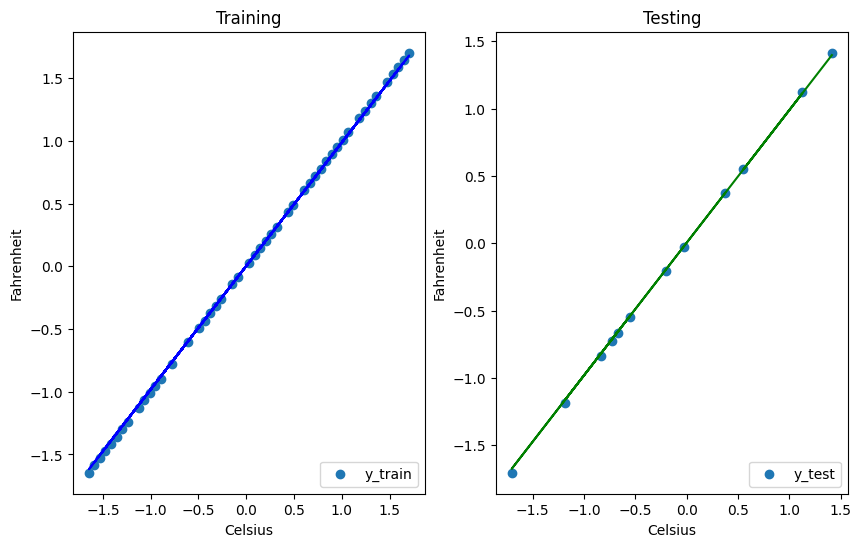

In [33]:
def repeat(type_graph):
    plt.title(type_graph)
    plt.xlabel("Celsius")
    plt.ylabel("Fahrenheit")
    plt.legend(loc="lower right")
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.scatter(x_train, y_train,label="y_train")
plt.plot(x_train,train_predict, color="blue")
repeat("Training")

plt.subplot(1,2,2)
plt.scatter(x_test, y_test, label='y_test')
plt.plot(x_test, test_predict, color="green")
repeat("Testing")

plt.show()